# 0. Load packages and imports

In [1]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [3]:
sentencing = pd.read_csv("../../../data/sentencing_asof0405.csv")

/Users/rebeccajohnson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,11,14,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 0.2: Print head, dimensions, info (0 points)

In [4]:
print(sentencing.head())
print(sentencing.shape)
print(sentencing.info())

        CASE_ID  CASE_PARTICIPANT_ID          RECEIVED_DATE  \
0  149765331439         175691153649  8/15/1984 12:00:00 AM   
1  149765331439         175691153649  8/15/1984 12:00:00 AM   
2  149765331439         175691153649  8/15/1984 12:00:00 AM   
3  149765331439         175691153649  8/15/1984 12:00:00 AM   
4  149765331439         175691153649  8/15/1984 12:00:00 AM   

    OFFENSE_CATEGORY  PRIMARY_CHARGE_FLAG    CHARGE_ID  CHARGE_VERSION_ID  \
0  PROMIS Conversion                False  50510112469       116304211997   
1  PROMIS Conversion                False  50510213021        98265074680   
2  PROMIS Conversion                False  50516447217       131972895911   
3  PROMIS Conversion                False  50516497493       131966356472   
4  PROMIS Conversion                False  50516648320        98059642859   

  DISPOSITION_CHARGED_OFFENSE_TITLE  CHARGE_COUNT        DISPOSITION_DATE  \
0               FIRST DEGREE MURDER             2  12/17/2014 12:00:00 AM   
1   

# Part one: data cleaning/interpretation (group)

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [5]:
# scenario one: using the method .nunique()
print(sentencing['CASE_ID'].nunique())

# scenario two: finding the length of the list created using the method .unique()
print(len(pd.unique(sentencing['CASE_PARTICIPANT_ID'])))

#scenario three: using the method series.value_counts()
print(len(list(sentencing.CHARGE_ID.value_counts())))

197519
211977
229015


Why there are more unique people than unique cases?

There are more unique people than unique cases because cases can contain multiple unique individuals. For example, a case of Grand Theft Auto could have been perpetrated by 3 participants, and multiple examples of cases with multiple participants will add up so that there will be more unique people than unique cases.

Why there are more unique charges than unique people?

There are more unique charges than unique people as multiple unique charges can be attributed to an individual. For example, one participant can be charged with home invasion and assault, and this further proves the compounding effect that we have seen in the previous example with unique people > unique cases.

In [6]:
#mean and median number of charges per case
mean_charges_per_case = sentencing.groupby('CASE_ID')['CHARGE_ID'].nunique().mean()
print("mean charges per case: " + str(mean_charges_per_case))
median_charges_per_case = sentencing.groupby('CASE_ID')['CHARGE_ID'].nunique().median()
print("median charges per case: " + str(median_charges_per_case))

#mean and median number of charges per participant
mean_charges_per_participant = sentencing.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].nunique().mean()
print("mean charges per participant: " + str(mean_charges_per_participant))
median_charges_per_participant = sentencing.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].nunique().median()
print("median charges per participant: " + str(median_charges_per_participant))

#mean and median number of participants per case
mean_participants_per_case = sentencing.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique().mean()
print("mean participants per case: " + str(mean_participants_per_case))
median_participants_per_case = sentencing.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique().median()
print("median participants per case: " + str(median_participants_per_case))

mean charges per case: 1.1594580774507768
median charges per case: 1.0
mean charges per participant: 1.1261457610967227
median charges per participant: 1.0
mean participants per case: 1.0731980214561636
median participants per case: 1.0


## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


In [7]:
#indicator for whether or not there is a difference between the original charge and most updated charge

sentencing["is_changed_offense"] = sentencing["OFFENSE_CATEGORY"] != sentencing["UPDATED_OFFENSE_CATEGORY"]
sentencing["is_changed_offense"]
sentencing[sentencing["is_changed_offense"]]["OFFENSE_CATEGORY"].sort_values().first
sentencing[sentencing["is_changed_offense"]][["OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY"]].head(1)
#the updated example showcases homicide as the changed offense, this can be because the original charge related to a death (i.e. manslaughter) could have been changed to a homicide

#if indicator returns True, then original charge has been changed to an updated offense
pd.crosstab(sentencing.is_changed_offense, sentencing.OFFENSE_CATEGORY)



0          True
1          True
2          True
3          True
4          True
          ...  
248141     True
248142    False
248143    False
248144    False
248145    False
Name: is_changed_offense, Length: 248146, dtype: bool

<bound method NDFrame.first of 161337         Aggravated Assault Police Officer
231526         Aggravated Assault Police Officer
204443         Aggravated Assault Police Officer
204444         Aggravated Assault Police Officer
138559         Aggravated Assault Police Officer
                           ...                  
225629    Violation of Sex Offender Registration
65257     Violation of Sex Offender Registration
114277    Violation of Sex Offender Registration
59875     Violation of Sex Offender Registration
17990     Violation of Sex Offender Registration
Name: OFFENSE_CATEGORY, Length: 35865, dtype: object>

,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY
0,PROMIS Conversion,Homicide


OFFENSE_CATEGORY,Aggravated Assault Police Officer,Aggravated Assault Police Officer Firearm,Aggravated Battery,Aggravated Battery Police Officer,Aggravated Battery Police Officer Firearm,Aggravated Battery With A Firearm,Aggravated DUI,Aggravated Discharge Firearm,Aggravated Fleeing and Eluding,Aggravated Identity Theft,...,Tampering,Theft,Theft by Deception,UUW - Unlawful Use of Weapon,Unlawful Restraint,Vehicular Hijacking,Vehicular Invasion,Violate Bail Bond,Violation Order Of Protection,Violation of Sex Offender Registration
is_changed_offense,,,,,,,,,,,,,,,,,,,,,
False,233,0,2926,6088,0,1396,14490,420,1941,37,...,3,5561,26,24415,61,678,57,61,371,2
True,431,188,1927,710,40,86,748,540,546,145,...,11,1025,244,2155,151,160,48,2,152,106


Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.

It is possible to organize the dataframe so that a participant (CASE_PARTICIPANT_ID) is grouped by the ID of unique cases they are involved in (CASE_ID).

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [8]:
#Simplifying Charges

sentencing["simplified_offense_derived"] = sentencing["UPDATED_OFFENSE_CATEGORY"].str.replace("Aggravated ", "") #combines aggravated and non-aggravated offenses of same crime

conditions = [sentencing["simplified_offense_derived"].str.contains("Arson"), 
             sentencing["simplified_offense_derived"].str.contains("Homicide"),
             sentencing["simplified_offense_derived"].str.contains("Vehic"),
             sentencing["simplified_offense_derived"].str.contains("Battery")]

choices = ["Arson", "Homicide", "Vehic", "Battery"]

sentencing["simplified_offense_derived"] = np.select(conditions, choices, sentencing["simplified_offense_derived"])

difference = sentencing.UPDATED_OFFENSE_CATEGORY.nunique() - sentencing.simplified_offense_derived.nunique() #difference in # of unique offenses after simplification
print("difference between # of unique offenses in the updated and oritinal offense fields: " + str(difference))

difference between # of unique offenses in the updated and oritinal offense fields: 14


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [9]:
#Race
sentencing["is_black_derived"] = np.where((sentencing["RACE"] == "Black") | (sentencing["RACE"] == "White/Black [Hispanic or Latino]"), True, False)

sentencing["is_hisp_derived"] = np.where((sentencing["RACE"] == "HISPANIC") | (sentencing["RACE"] == "White [Hispanic or Latino]"), True, False)

sentencing["is_white_derived"] = np.where((sentencing["RACE"] == "White"), True, False)

sentencing["is_othereth_derived"] = np.where((sentencing["is_black_derived"] == False) & (sentencing["is_hisp_derived"] == False) & (sentencing["is_white_derived"] == False), True, False)

#Gender
sentencing["is_male_derived"] = np.where(sentencing["GENDER"] == "Male", True, False)

#Age
sentencing.AGE_AT_INCIDENT.sort_values(na_position='first').values

sentencing.AGE_AT_INCIDENT.quantile(q = 0.9999)

sentencing["age_derived"] = np.where(sentencing["AGE_AT_INCIDENT"] > 81.0, 81.0, sentencing["AGE_AT_INCIDENT"])

sentencing.age_derived.sort_values(na_position='first').values

#Sentence Derived
sentencing["sentenceymd_derived"] = sentencing.SENTENCE_DATE.str[:-12]

sentencing["sentenceymd_derived"] = np.where(sentencing.sentenceymd_derived.str[-4:-2].astype("int") > 20, sentencing.sentenceymd_derived.str[:-3] + "0" + sentencing.sentenceymd_derived.str[-2:], sentencing.sentenceymd_derived)

sentencing["sentenceymd_derived"] = pd.to_datetime(sentencing.sentenceymd_derived)

sentencing["sentenceym_derived"] = sentencing.sentenceymd_derived.astype('datetime64[M]')

#Judge Identifier
judges = sentencing.groupby("SENTENCE_JUDGE").CASE_ID.count().reset_index()
judges["judgeid_derived"] = "judge_" + (judges.index).astype("string")
judges = judges[["SENTENCE_JUDGE","judgeid_derived"]]
judges[(judges.SENTENCE_JUDGE.str.contains("Doug")) | (judges.SENTENCE_JUDGE.str.contains("Shelley"))] #to find Doug Simpson and Shelley Sutker

sentencing = pd.merge(sentencing, judges)
sentencing["judgeid_derived"] = np.where(sentencing.judgeid_derived == "judge_71", "judge_70", sentencing.judgeid_derived) #combines "Doug Simpson" and "Douglas J. Simpson"
sentencing["judgeid_derived"] = np.where(sentencing.judgeid_derived == "judge_281", "judge_280", sentencing.judgeid_derived) #combines "Shelley Sutker" and "Shelley Sutker-Dermer"
sentencing[["SENTENCE_JUDGE","judgeid_derived"]][(sentencing.SENTENCE_JUDGE.str.contains("Doug")) | (sentencing.SENTENCE_JUDGE.str.contains("Shelley"))].value_counts()

#Random sample of 10 rows including each new variable
sentencing.sample(10)

array([ nan,  nan,  nan, ..., 130., 137., 137.])

81.0

array([nan, nan, nan, ..., 81., 81., 81.])

,SENTENCE_JUDGE,judgeid_derived
70,Doug Simpson,judge_70
71,Douglas J Simpson,judge_71
280,Shelley Sutker,judge_280
281,Shelley Sutker-Dermer,judge_281


SENTENCE_JUDGE          judgeid_derived
Shelley  Sutker-Dermer  judge_280          2507
Douglas J Simpson       judge_70            101
Doug  Simpson           judge_70              6
Shelley  Sutker         judge_280             1
dtype: int64

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
56523,211139863879,203096373853,5/18/2007 12:00:00 AM,PROMIS Conversion,True,88963138357,179460810924,ARMED VIOLENCE/CATEGORY I WEAPON,1,4/13/2015 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,21.0,2008-07-09,2008-07-01,judge_35
14653,420480758028,825035996844,7/24/2016 12:00:00 AM,Retail Theft,True,405188676228,764575573187,RETAIL THEFT/DISP MERCH/<$300,1,1/26/2017 12:00:00 AM,...,Retail Theft,True,False,False,False,True,40.0,2017-01-25,2017-01-01,judge_316
181785,399419595266,758904098950,5/6/2013 12:00:00 AM,Driving With Suspended Or Revoked License,True,369060050341,686859472708,"FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...",1,1/9/2014 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,True,False,False,False,37.0,2014-01-09,2014-01-01,judge_285
31377,393931489324,742791930196,8/2/2012 12:00:00 AM,Narcotics,False,360491097173,670730038570,[POSSESSION OF CANNABIS WITH INTENT TO DELIVER...,2,11/29/2012 12:00:00 AM,...,Narcotics,True,False,False,False,True,56.0,2012-11-29,2012-11-01,judge_212
96861,422493107596,831756619966,12/8/2016 12:00:00 AM,Fraudulent ID,True,408964940119,765440087090,ATTEMPT POSS FRAUDULENT ID CARD,1,2/9/2017 12:00:00 AM,...,Fraudulent ID,False,False,True,False,False,35.0,2017-02-09,2017-02-01,judge_169
234437,413296627481,802191691557,5/23/2015 12:00:00 AM,UUW - Unlawful Use of Weapon,True,391950058609,743258775365,ATTEMPT AGGRAVATED UNLAWFUL USE OF WEAPON,1,1/5/2016 12:00:00 AM,...,UUW - Unlawful Use of Weapon,True,False,False,False,True,19.0,2016-01-05,2016-01-01,judge_223
43952,390185226645,732334639108,1/27/2012 12:00:00 AM,Narcotics,True,353587227465,668686276881,POSSESSION OF A CONTROLLED SUBSTANCE,1,7/24/2012 12:00:00 AM,...,Narcotics,True,False,False,False,True,43.0,2012-07-24,2012-07-01,judge_211
232518,386421047697,721616786326,7/18/2011 12:00:00 AM,Narcotics,True,347091044034,651636930445,POSSESSION OF A CONTROLLED SUBSTANCE,1,10/24/2011 12:00:00 AM,...,Narcotics,True,False,False,False,True,20.0,2011-10-24,2011-10-01,judge_150
213089,416967113149,813706517719,12/14/2015 12:00:00 AM,Retail Theft,True,398199890733,763397166186,RETAIL THEFT/DISP MERCH/<$300,1,12/28/2016 12:00:00 AM,...,Retail Theft,False,False,True,False,False,NaN,2016-12-28,2016-12-01,judge_101
39550,393283125948,741013768867,7/3/2012 12:00:00 AM,Robbery,True,358596705893,667181832111,THEFT,1,10/12/2012 12:00:00 AM,...,Robbery,True,False,False,False,False,17.0,2012-10-12,2012-10-01,judge_276


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [11]:
#Subset to cases with only one participant
one_participant = sentencing.groupby("CASE_ID").agg(participant_count = ("CASE_PARTICIPANT_ID", "count")).reset_index()
one_participant = one_participant[one_participant["participant_count"] == 1]



In [12]:
## rj comment- using count in the aggregation i think 
## finds just the total rows for that case_id
## but a case could have one participant 
## who faces multiple charges and accidentally be filtered out
## by the above
## code here finds the number of unique participants per case 
## rather than the number of rows per case
one_participant_alternate =  sentencing.groupby("CASE_ID").agg(participant_count =
                                    ("CASE_PARTICIPANT_ID", "nunique")).reset_index()

one_participant_alternate.participant_count.value_counts()

## example of a case that has only one participant but multiple rows
diff_ids = list(set(one_participant_alternate.CASE_ID[one_participant_alternate.participant_count == 1]).difference(
            set(one_participant.CASE_ID[one_participant.participant_count == 1])))

## example- the case has two
## rows since there are multiple charges/
## offenses but it's the same single participant with those charges
sentencing[sentencing.CASE_ID.isin([diff_ids[1]])]

1     184746
2      10596
3       1306
4        252
5         58
6          8
7          7
8          4
9          3
13         2
17         2
10         1
Name: participant_count, dtype: int64

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
14113,411569029122,796864285487,2/17/2015 12:00:00 AM,Aggravated Battery Police Officer,False,389113851197,724712084122,AGGRAVATED BATTERY,3,5/4/2015 12:00:00 AM,...,Narcotics,True,False,False,False,True,55.0,2015-04-29,2015-04-01,judge_316
14114,411569029122,796864285487,2/17/2015 12:00:00 AM,Aggravated Battery Police Officer,False,389832241775,729007561676,POSSESSION OF A CONTROLLED SUBSTANCE,2,4/29/2015 12:00:00 AM,...,Narcotics,True,False,False,False,True,55.0,2015-04-29,2015-04-01,judge_316


In [13]:
#Combines all charges for each participant
one_participant_series = one_participant.CASE_ID
sentencing = sentencing[sentencing.CASE_ID.isin(one_participant_series)]
sentencing = sentencing[(sentencing.PRIMARY_CHARGE_FLAG == True) & (sentencing.CURRENT_SENTENCE_FLAG == True)]
sentencing[["CASE_ID", 'CASE_PARTICIPANT_ID', 'CHARGE_ID']].count()
sentencing.shape

#Filters out nan or nonsensical judges
sentencing = sentencing[(~sentencing.SENTENCE_JUDGE.isnull()) & (sentencing.SENTENCE_JUDGE != "FLOOD")]

#Subset sentencing date to between 01-01-2012 and 04-05-21 (inclusive)
sentencing = sentencing[(sentencing.sentenceymd_derived >= "01-01-2012") & (sentencing.sentenceymd_derived <= "04-05-2021")]
print("number of rows in the data: " + str(sentencing.shape[0]))

CASE_ID                137154
CASE_PARTICIPANT_ID    137154
CHARGE_ID              137154
dtype: int64

(137154, 52)

number of rows in the data: 121396


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [14]:
# problem set 1
# group portion

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import plotnine as p9
from plotnine import ggplot, geom_point, aes, theme, element_text


# 2.0 Load Data 

sentencing_cleaned = pd.read_pickle("../../../data/sentencing_cleaned.pkl")



## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

9        2014-10-01
16       2014-08-01
18       2013-12-01
19       2012-09-01
26       2014-09-01
            ...    
248141   2021-03-01
248142   2021-03-01
248143   2021-03-01
248144   2021-03-01
248145   2021-03-01
Name: sentenceym_derived, Length: 135165, dtype: datetime64[ns]

,sentenceym_derived,Prop_Black,Prop_White
0,2012-01-01,0.677419,0.144564
1,2012-02-01,0.648966,0.160690
2,2012-03-01,0.638958,0.158189
3,2012-04-01,0.696379,0.146936
4,2012-05-01,0.695146,0.144337
...,...,...,...
106,2020-11-01,0.606925,0.154786
107,2020-12-01,0.646182,0.158287
108,2021-01-01,0.621924,0.111857
109,2021-02-01,0.651731,0.134420


                    Prop_Black  Prop_White
sentenceym_derived                        
2012-01-01            0.677419    0.144564
2012-02-01            0.648966    0.160690
2012-03-01            0.638958    0.158189
2012-04-01            0.696379    0.146936
2012-05-01            0.695146    0.144337
...                        ...         ...
2020-11-01            0.606925    0.154786
2020-12-01            0.646182    0.158287
2021-01-01            0.621924    0.111857
2021-02-01            0.651731    0.134420
2021-03-01            0.680451    0.148496

[111 rows x 2 columns]


Text(0.5, 0, 'Month Sentenced')

Text(0, 0.5, 'Proportion')

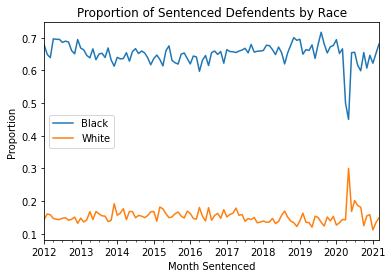

In [15]:
# 2.1 Investigating one type of between-group difference: who reaches the sentencing stage? 

data = sentencing_cleaned[["CASE_ID", "sentenceym_derived", "is_black_derived", "is_white_derived", "COMMITMENT_TYPE", "simplified_offense_derived", "RACE"]]

pd.to_datetime(data["sentenceym_derived"])

denominator = data.groupby("sentenceym_derived")["CASE_ID"].count()
data2 = data[data["is_black_derived"] == True]
data3 = data[data["is_white_derived"] == True]

num_black = data2.groupby("sentenceym_derived")["is_black_derived"].count()
num_white = data3.groupby("sentenceym_derived")["is_white_derived"].count()

d2 = pd.DataFrame(num_black)
d3 = pd.DataFrame(num_white)
props = pd.merge(d2, d3, on = "sentenceym_derived")

props["Prop_Black"] = props["is_black_derived"]/denominator
props["Prop_White"] = props["is_white_derived"]/denominator

prop_table = props[["Prop_Black", "Prop_White"]]
prop_table.reset_index()

# printing final table
print(prop_table)


# visualizing
prop_table.plot(kind = "line", title = "Proportion of Sentenced Defendents by Race")
plt.xlabel("Month Sentenced")
plt.ylabel("Proportion")
plt.legend(["Black", "White"])
plt.show()


#Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020?

$\frac{\sum_{n=1}^{\infty} Black}{\sum_{n=1}^{\infty} Total}$ and

$\frac{\sum_{n=1}^{\infty} White}{\sum_{n=1}^{\infty} Total}$


It seems as though there is consitently a disparity in sentencing between black and white defendants that stays constant until about April and May of 2020. An explanation for this could be with such drastic lifestyle changes due to COVID and that being the period of the strongest lockdowns, the demographics of people committing crimes changed and/or just fewer overall number of people committing crimes so the sentencing leveled out. 

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [18]:
data2_incar = data2[data2["COMMITMENT_TYPE"] != "Probation"]
data3_incar = data3[data3["COMMITMENT_TYPE"] != "Probation"]


## rj comment --- i think filtering to != Probation doesn't 
## get you the same thing as filtering to commitment_type == "illinois department..."
## since there's a lot of non IDOC statuses that also aren;t equal to the probation string
## so the below not only includes illinois dept of corrections but also
## 710/410 probation, conditional discharge, etc.
data3_incar.COMMITMENT_TYPE.value_counts()

Illinois Department of Corrections          7877
710/410 Probation                            984
Cook County Department of Corrections        861
Conditional Discharge                        500
Court Supervision                            457
Mental Health Probation                      346
Intensive Probation Services                 281
Intensive Drug Probation Services            220
Drug Court Probation                         133
Sex Offender Probation                        97
2nd Chance Probation                          82
Cook County Boot Camp                         47
Veteran's Court Probation                     35
Cook County Impact Incarceration Program      15
Gang Probation                                14
Inpatient Mental Health Services              10
Conditional Release                            5
Juvenile IDOC                                  3
Periodic Imprisonment                          2
Drug School                                    1
Home Confinement    

    sentenceym_derived       gap
0           2012-01-01  0.137486
1           2012-02-01  0.167966
2           2012-03-01  0.075385
3           2012-04-01  0.062232
4           2012-05-01  0.134308
..                 ...       ...
106         2020-11-01  0.073826
107         2020-12-01  0.109646
108         2021-01-01 -0.006906
109         2021-02-01  0.194981
110         2021-03-01  0.127177

[111 rows x 2 columns]


/Users/rebeccajohnson/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


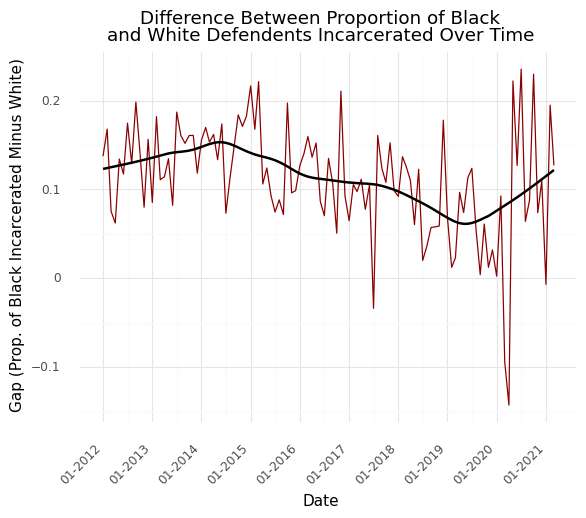

<ggplot: (8761658241371)>

In [19]:
num_black_incar = data2_incar.groupby("sentenceym_derived")["COMMITMENT_TYPE"].count()
num_white_incar = data3_incar.groupby("sentenceym_derived")["COMMITMENT_TYPE"].count()

prop_black_incar = num_black_incar/num_black
prop_white_incar = num_white_incar/num_white
prop_difference = prop_black_incar - prop_white_incar
prop_difference = pd.DataFrame(prop_difference)
prop_difference = prop_difference.reset_index()
prop_difference = prop_difference.set_axis(["sentenceym_derived", "gap"], axis=1, inplace=False)
print(prop_difference)


## change to ggplot and do smooth line

prop_diff_plot = (p9.ggplot(data=prop_difference, mapping=p9.aes(x= "sentenceym_derived", y = "gap")) +
 p9.geom_line(color = "darkred") +
 p9.geom_smooth(span = .3, alpha = .2) +
    p9.theme_minimal() +
 p9.theme(axis_text_x= element_text(angle = 45, hjust = 1))
)


prop_diff_plot + p9.labs(x = "Date", y = "Gap (Prop. of Black Incarcerated Minus White)", title = "Difference Between Proportion of Black\nand White Defendents Incarcerated Over Time") + p9.scale_x_date(date_labels = "%m-%Y")


## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [20]:
black_offense_counts = data2.groupby("simplified_offense_derived")["is_black_derived"].count().sort_values(ascending = False)
white_offense_counts = data3.groupby("simplified_offense_derived")["is_white_derived"].count().sort_values(ascending = False)

b1 = pd.DataFrame(black_offense_counts[:10])
w1 = pd.DataFrame(white_offense_counts[:10])

blist = list(b1.index)
wlist = list(w1.index)
total_list = blist + wlist
freq_offense_list = []
for i in total_list :
    if i not in freq_offense_list :
        freq_offense_list.append(i)
print(freq_offense_list)

['Narcotics', 'UUW - Unlawful Use of Weapon', 'Retail Theft', 'Battery', 'Driving With Suspended Or Revoked License', 'DUI', 'Burglary', 'Theft', 'Vehicle-related', 'Robbery', 'Residential Burglary', 'Other Offense']


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [21]:
list_of_dicts = []

for offense in freq_offense_list:
    data2_incar_copy = data2_incar[data2_incar["simplified_offense_derived"] == offense]
    data2_copy = data2[data2["simplified_offense_derived"] == offense]
    data2_incar_copy.dropna()
    data2_copy.dropna()
    black_incar_total = data2_incar_copy.shape[0]
    black_total = data2_copy.shape[0]
    
    data3_incar_copy = data3_incar[data3_incar["simplified_offense_derived"] == offense]
    data3_copy = data3[data3["simplified_offense_derived"] == offense]
    data3_incar_copy.dropna()
    data3_copy.dropna()
    white_incar_total = data3_incar_copy.shape[0]
    white_total = data3_copy.shape[0]

    black_rate = black_incar_total/black_total
    white_rate = white_incar_total/white_total
    
    dict_to_add = {'Offense': offense, 'Black_Incarceration_Rate': black_rate, 'White_Incarceration_Rate': white_rate, 'Difference': black_rate - white_rate}
    list_of_dicts.append(dict_to_add)
    
incar_rates = pd.DataFrame(list_of_dicts)
print(incar_rates)

,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
19,155222744754,2012-09-01,True,False,710/410 Probation,Narcotics,Black
68,163122791826,2012-01-01,True,False,Illinois Department of Corrections,Narcotics,Black
73,163851778417,2013-10-01,True,False,710/410 Probation,Narcotics,Black
138,169990597409,2016-04-01,True,False,Illinois Department of Corrections,Narcotics,Black
178,175703390999,2012-10-01,True,False,Illinois Department of Corrections,Narcotics,Black
...,...,...,...,...,...,...,...
248107,444814283443,2021-01-01,True,False,2nd Chance Probation,Narcotics,Black
248113,444843213813,2021-02-01,True,False,Cook County Department of Corrections,Narcotics,Black
248122,444999907748,2021-02-01,True,False,Cook County Department of Corrections,Narcotics,Black
248136,445327834231,2021-03-01,True,False,Cook County Department of Corrections,Narcotics,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
19,155222744754,2012-09-01,True,False,710/410 Probation,Narcotics,Black
58,159359640860,2015-04-01,True,False,Probation,Narcotics,Black
68,163122791826,2012-01-01,True,False,Illinois Department of Corrections,Narcotics,Black
73,163851778417,2013-10-01,True,False,710/410 Probation,Narcotics,Black
119,166917075982,2013-01-01,True,False,Probation,Narcotics,Black
...,...,...,...,...,...,...,...
248107,444814283443,2021-01-01,True,False,2nd Chance Probation,Narcotics,Black
248113,444843213813,2021-02-01,True,False,Cook County Department of Corrections,Narcotics,Black
248122,444999907748,2021-02-01,True,False,Cook County Department of Corrections,Narcotics,Black
248136,445327834231,2021-03-01,True,False,Cook County Department of Corrections,Narcotics,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
114,166668891587,2014-12-01,False,True,Cook County Department of Corrections,Narcotics,White
172,175441549119,2013-12-01,False,True,Illinois Department of Corrections,Narcotics,White
258,181053600403,2015-07-01,False,True,Cook County Department of Corrections,Narcotics,White
400,182723044313,2012-03-01,False,True,Illinois Department of Corrections,Narcotics,White
414,183722830919,2014-08-01,False,True,Cook County Department of Corrections,Narcotics,White
...,...,...,...,...,...,...,...
247828,443373345403,2021-02-01,False,True,Illinois Department of Corrections,Narcotics,White
247982,443952833938,2021-03-01,False,True,Drug Court Probation,Narcotics,White
248024,444142570174,2021-02-01,False,True,Cook County Department of Corrections,Narcotics,White
248038,444193528745,2020-12-01,False,True,Illinois Department of Corrections,Narcotics,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
114,166668891587,2014-12-01,False,True,Cook County Department of Corrections,Narcotics,White
162,172825039431,2012-08-01,False,True,Probation,Narcotics,White
172,175441549119,2013-12-01,False,True,Illinois Department of Corrections,Narcotics,White
258,181053600403,2015-07-01,False,True,Cook County Department of Corrections,Narcotics,White
400,182723044313,2012-03-01,False,True,Illinois Department of Corrections,Narcotics,White
...,...,...,...,...,...,...,...
248038,444193528745,2020-12-01,False,True,Illinois Department of Corrections,Narcotics,White
248087,444536434404,2021-03-01,False,True,Illinois Department of Corrections,Narcotics,White
248098,444746583439,2021-03-01,False,True,Probation,Narcotics,White
248099,444746730294,2021-03-01,False,True,Probation,Narcotics,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
124,167249995524,2019-02-01,True,False,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,Black
1910,215324781462,2012-03-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
2088,218675858219,2012-04-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
2166,220263063512,2012-04-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
2230,221276948167,2013-10-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
...,...,...,...,...,...,...,...
248041,444229361285,2021-03-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
248049,444274298815,2021-02-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
248058,444352425500,2021-03-01,True,False,Court Supervision,UUW - Unlawful Use of Weapon,Black
248131,445196839863,2021-02-01,True,False,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
42,157737190446,2013-08-01,True,False,Probation,UUW - Unlawful Use of Weapon,Black
124,167249995524,2019-02-01,True,False,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,Black
1371,212472716880,2012-01-01,True,False,Probation,UUW - Unlawful Use of Weapon,Black
1910,215324781462,2012-03-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
2088,218675858219,2012-04-01,True,False,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,Black
...,...,...,...,...,...,...,...
248105,444806793855,2021-03-01,True,False,Probation,UUW - Unlawful Use of Weapon,Black
248118,444949536596,2021-02-01,True,False,Probation,UUW - Unlawful Use of Weapon,Black
248131,445196839863,2021-02-01,True,False,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,Black
248134,445237812317,2021-02-01,True,False,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
3886,225055372019,2012-03-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
12012,378141528153,2013-02-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
14940,379645173138,2013-12-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
20939,381770453949,2012-07-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
22347,382152422950,2014-03-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
...,...,...,...,...,...,...,...
246068,440214501412,2020-08-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
246757,440956117504,2021-01-01,False,True,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,White
247027,441413422953,2020-09-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
247300,442057380689,2021-01-01,False,True,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
3886,225055372019,2012-03-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
12012,378141528153,2013-02-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
12713,378588700628,2012-01-01,False,True,Probation,UUW - Unlawful Use of Weapon,White
14940,379645173138,2013-12-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
20517,381648124007,2012-10-01,False,True,Probation,UUW - Unlawful Use of Weapon,White
...,...,...,...,...,...,...,...
247300,442057380689,2021-01-01,False,True,Cook County Department of Corrections,UUW - Unlawful Use of Weapon,White
247370,442222592194,2021-01-01,False,True,Illinois Department of Corrections,UUW - Unlawful Use of Weapon,White
247463,442452419756,2020-12-01,False,True,Probation,UUW - Unlawful Use of Weapon,White
247560,442692820854,2020-09-01,False,True,Probation,UUW - Unlawful Use of Weapon,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
50,158663109151,2016-03-01,True,False,Cook County Department of Corrections,Retail Theft,Black
171,175427744780,2013-03-01,True,False,Cook County Department of Corrections,Retail Theft,Black
415,183788328103,2015-06-01,True,False,Cook County Department of Corrections,Retail Theft,Black
426,184271039409,2017-05-01,True,False,Cook County Department of Corrections,Retail Theft,Black
1083,210316596588,2012-06-01,True,False,Conditional Discharge,Retail Theft,Black
...,...,...,...,...,...,...,...
247995,443994100101,2021-03-01,True,False,Illinois Department of Corrections,Retail Theft,Black
247996,444004233073,2021-02-01,True,False,Cook County Department of Corrections,Retail Theft,Black
248017,444113052385,2020-12-01,True,False,Cook County Department of Corrections,Retail Theft,Black
248066,444439804030,2021-03-01,True,False,Cook County Department of Corrections,Retail Theft,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
50,158663109151,2016-03-01,True,False,Cook County Department of Corrections,Retail Theft,Black
66,162816159271,2012-11-01,True,False,Probation,Retail Theft,Black
171,175427744780,2013-03-01,True,False,Cook County Department of Corrections,Retail Theft,Black
176,175522025479,2012-06-01,True,False,Probation,Retail Theft,Black
415,183788328103,2015-06-01,True,False,Cook County Department of Corrections,Retail Theft,Black
...,...,...,...,...,...,...,...
247995,443994100101,2021-03-01,True,False,Illinois Department of Corrections,Retail Theft,Black
247996,444004233073,2021-02-01,True,False,Cook County Department of Corrections,Retail Theft,Black
248017,444113052385,2020-12-01,True,False,Cook County Department of Corrections,Retail Theft,Black
248066,444439804030,2021-03-01,True,False,Cook County Department of Corrections,Retail Theft,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
967,208167672175,2016-05-01,False,True,Cook County Department of Corrections,Retail Theft,White
1352,212280924679,2019-09-01,False,True,Cook County Department of Corrections,Retail Theft,White
1354,212326302773,2013-11-01,False,True,Illinois Department of Corrections,Retail Theft,White
4434,226346224584,2013-08-01,False,True,Cook County Department of Corrections,Retail Theft,White
6458,231302863468,2012-01-01,False,True,Illinois Department of Corrections,Retail Theft,White
...,...,...,...,...,...,...,...
246718,440903396677,2020-03-01,False,True,Cook County Department of Corrections,Retail Theft,White
246865,441135573913,2020-12-01,False,True,Illinois Department of Corrections,Retail Theft,White
246867,441136014477,2020-11-01,False,True,Illinois Department of Corrections,Retail Theft,White
247670,442969348201,2020-11-01,False,True,Illinois Department of Corrections,Retail Theft,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
487,186892689011,2014-01-01,False,True,Probation,Retail Theft,White
967,208167672175,2016-05-01,False,True,Cook County Department of Corrections,Retail Theft,White
1352,212280924679,2019-09-01,False,True,Cook County Department of Corrections,Retail Theft,White
1354,212326302773,2013-11-01,False,True,Illinois Department of Corrections,Retail Theft,White
4434,226346224584,2013-08-01,False,True,Cook County Department of Corrections,Retail Theft,White
...,...,...,...,...,...,...,...
247538,442613519331,2020-10-01,False,True,Probation,Retail Theft,White
247670,442969348201,2020-11-01,False,True,Illinois Department of Corrections,Retail Theft,White
247807,443345883579,2021-03-01,False,True,Probation,Retail Theft,White
247819,443361597029,2021-03-01,False,True,Probation,Retail Theft,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
70,163729595330,2013-02-01,True,False,Illinois Department of Corrections,Battery,Black
194,176315040707,2015-01-01,True,False,Illinois Department of Corrections,Battery,Black
396,182050890480,2012-02-01,True,False,Illinois Department of Corrections,Battery,Black
665,195256796846,2012-04-01,True,False,Illinois Department of Corrections,Battery,Black
667,195687668453,2014-06-01,True,False,Illinois Department of Corrections,Battery,Black
...,...,...,...,...,...,...,...
247655,442917214792,2021-03-01,True,False,Cook County Department of Corrections,Battery,Black
247766,443213126956,2021-03-01,True,False,Illinois Department of Corrections,Battery,Black
247809,443353226313,2021-02-01,True,False,Cook County Department of Corrections,Battery,Black
248084,444514553058,2021-03-01,True,False,Mental Health Probation,Battery,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
70,163729595330,2013-02-01,True,False,Illinois Department of Corrections,Battery,Black
194,176315040707,2015-01-01,True,False,Illinois Department of Corrections,Battery,Black
396,182050890480,2012-02-01,True,False,Illinois Department of Corrections,Battery,Black
665,195256796846,2012-04-01,True,False,Illinois Department of Corrections,Battery,Black
667,195687668453,2014-06-01,True,False,Illinois Department of Corrections,Battery,Black
...,...,...,...,...,...,...,...
248084,444514553058,2021-03-01,True,False,Mental Health Probation,Battery,Black
248085,444515140477,2021-03-01,True,False,Mental Health Probation,Battery,Black
248117,444947186921,2021-02-01,True,False,Probation,Battery,Black
248133,445217840081,2021-02-01,True,False,Probation,Battery,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
1316,211580868458,2019-01-01,False,True,Illinois Department of Corrections,Battery,White
1359,212327771319,2012-05-01,False,True,Illinois Department of Corrections,Battery,White
1969,216179328798,2015-08-01,False,True,Illinois Department of Corrections,Battery,White
3362,223914017509,2012-08-01,False,True,Illinois Department of Corrections,Battery,White
3595,224372791504,2013-05-01,False,True,Illinois Department of Corrections,Battery,White
...,...,...,...,...,...,...,...
247542,442631729310,2021-03-01,False,True,Conditional Discharge,Battery,White
247546,442647736469,2021-03-01,False,True,Illinois Department of Corrections,Battery,White
247562,442695023674,2020-11-01,False,True,Illinois Department of Corrections,Battery,White
247993,443987491641,2021-01-01,False,True,Illinois Department of Corrections,Battery,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
712,197860677032,2014-10-01,False,True,Probation,Battery,White
818,204810133813,2013-06-01,False,True,Probation,Battery,White
869,206473409826,2015-01-01,False,True,Probation,Battery,White
1316,211580868458,2019-01-01,False,True,Illinois Department of Corrections,Battery,White
1359,212327771319,2012-05-01,False,True,Illinois Department of Corrections,Battery,White
...,...,...,...,...,...,...,...
247808,443351023493,2020-12-01,False,True,Probation,Battery,White
247897,443568368407,2021-02-01,False,True,Probation,Battery,White
247993,443987491641,2021-01-01,False,True,Illinois Department of Corrections,Battery,White
248104,444804003616,2021-03-01,False,True,Cook County Department of Corrections,Battery,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2369,221497670739,2012-03-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
5694,229342206744,2012-07-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
5841,229815225642,2017-01-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
10972,377384345465,2012-06-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
11660,377944155474,2012-03-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
...,...,...,...,...,...,...,...
247898,443572333483,2021-02-01,True,False,Cook County Impact Incarceration Program,Driving With Suspended Or Revoked License,Black
248014,444083387741,2021-02-01,True,False,Conditional Discharge,Driving With Suspended Or Revoked License,Black
248015,444091758458,2021-03-01,True,False,Cook County Department of Corrections,Driving With Suspended Or Revoked License,Black
248053,444300732656,2021-02-01,True,False,Cook County Department of Corrections,Driving With Suspended Or Revoked License,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2369,221497670739,2012-03-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
5279,228403511682,2012-04-01,True,False,Probation,Driving With Suspended Or Revoked License,Black
5694,229342206744,2012-07-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
5841,229815225642,2017-01-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
10972,377384345465,2012-06-01,True,False,Illinois Department of Corrections,Driving With Suspended Or Revoked License,Black
...,...,...,...,...,...,...,...
247898,443572333483,2021-02-01,True,False,Cook County Impact Incarceration Program,Driving With Suspended Or Revoked License,Black
248014,444083387741,2021-02-01,True,False,Conditional Discharge,Driving With Suspended Or Revoked License,Black
248015,444091758458,2021-03-01,True,False,Cook County Department of Corrections,Driving With Suspended Or Revoked License,Black
248053,444300732656,2021-02-01,True,False,Cook County Department of Corrections,Driving With Suspended Or Revoked License,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2048,217767855783,2013-04-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
2196,220650906701,2012-11-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
11769,378016261118,2012-07-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
12782,378609847701,2012-02-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
13042,378755968100,2012-08-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
...,...,...,...,...,...,...,...
248083,444514406203,2020-12-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
248106,444809730948,2021-03-01,False,True,Conditional Discharge,Driving With Suspended Or Revoked License,White
248143,445587767000,2021-03-01,False,True,Cook County Department of Corrections,Driving With Suspended Or Revoked License,White
248144,445592613204,2021-03-01,False,True,Cook County Department of Corrections,Driving With Suspended Or Revoked License,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2048,217767855783,2013-04-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
2196,220650906701,2012-11-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
6669,232481519064,2012-02-01,False,True,Probation,Driving With Suspended Or Revoked License,White
10944,377362904683,2012-01-01,False,True,Probation,Driving With Suspended Or Revoked License,White
11769,378016261118,2012-07-01,False,True,Illinois Department of Corrections,Driving With Suspended Or Revoked License,White
...,...,...,...,...,...,...,...
248106,444809730948,2021-03-01,False,True,Conditional Discharge,Driving With Suspended Or Revoked License,White
248111,444841010993,2021-02-01,False,True,Probation,Driving With Suspended Or Revoked License,White
248143,445587767000,2021-03-01,False,True,Cook County Department of Corrections,Driving With Suspended Or Revoked License,White
248144,445592613204,2021-03-01,False,True,Cook County Department of Corrections,Driving With Suspended Or Revoked License,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2200,220671466355,2012-07-01,True,False,Illinois Department of Corrections,DUI,White/Black [Hispanic or Latino]
2304,221405446005,2012-01-01,True,False,Illinois Department of Corrections,DUI,Black
2364,221489887441,2012-06-01,True,False,Illinois Department of Corrections,DUI,Black
3441,224103166326,2012-09-01,True,False,Conditional Discharge,DUI,Black
3866,224962413011,2012-06-01,True,False,Illinois Department of Corrections,DUI,Black
...,...,...,...,...,...,...,...
247196,441843119722,2020-09-01,True,False,Illinois Department of Corrections,DUI,Black
247389,442269291980,2021-01-01,True,False,Illinois Department of Corrections,DUI,White/Black [Hispanic or Latino]
247666,442947907419,2021-01-01,True,False,Illinois Department of Corrections,DUI,Black
247779,443258211340,2021-03-01,True,False,Court Supervision,DUI,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
1032,209542085049,2013-08-01,True,False,Probation,DUI,Black
2035,217475908695,2014-06-01,True,False,Probation,DUI,Black
2200,220671466355,2012-07-01,True,False,Illinois Department of Corrections,DUI,White/Black [Hispanic or Latino]
2269,221360802184,2014-04-01,True,False,Probation,DUI,Black
2304,221405446005,2012-01-01,True,False,Illinois Department of Corrections,DUI,Black
...,...,...,...,...,...,...,...
247834,443379807009,2020-12-01,True,False,Probation,DUI,Black
247910,443610075134,2021-03-01,True,False,Probation,DUI,Black
248002,444019505959,2021-03-01,True,False,Probation,DUI,Black
248005,444026554983,2021-03-01,True,False,Probation,DUI,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
1395,212484612109,2012-02-01,False,True,Illinois Department of Corrections,DUI,White
1820,214177259057,2013-04-01,False,True,Illinois Department of Corrections,DUI,White
1995,216533542266,2017-11-01,False,True,Illinois Department of Corrections,DUI,White
2039,217542727571,2013-01-01,False,True,Illinois Department of Corrections,DUI,White
2162,220204468498,2012-09-01,False,True,Illinois Department of Corrections,DUI,White
...,...,...,...,...,...,...,...
246259,440383971703,2020-07-01,False,True,Illinois Department of Corrections,DUI,White
246530,440680764995,2020-11-01,False,True,Court Supervision,DUI,White
246976,441309596700,2021-01-01,False,True,Illinois Department of Corrections,DUI,White
247586,442760374003,2020-12-01,False,True,Illinois Department of Corrections,DUI,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
731,200380996910,2014-03-01,False,True,Probation,DUI,White
1320,211821710120,2013-07-01,False,True,Probation,DUI,White
1395,212484612109,2012-02-01,False,True,Illinois Department of Corrections,DUI,White
1820,214177259057,2013-04-01,False,True,Illinois Department of Corrections,DUI,White
1995,216533542266,2017-11-01,False,True,Illinois Department of Corrections,DUI,White
...,...,...,...,...,...,...,...
247586,442760374003,2020-12-01,False,True,Illinois Department of Corrections,DUI,White
247750,443157762745,2021-01-01,False,True,Illinois Department of Corrections,DUI,White
248022,444127590998,2021-03-01,False,True,Probation,DUI,White
248057,444351691227,2021-03-01,False,True,Probation,DUI,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
406,182957130660,2015-08-01,True,False,Illinois Department of Corrections,Burglary,Black
573,190740134558,2012-04-01,True,False,Illinois Department of Corrections,Burglary,Black
574,190740281413,2012-04-01,True,False,Illinois Department of Corrections,Burglary,Black
590,191273951290,2012-04-01,True,False,Illinois Department of Corrections,Burglary,Black
1278,211022233287,2012-03-01,True,False,Illinois Department of Corrections,Burglary,Black
...,...,...,...,...,...,...,...
247936,443698187937,2021-01-01,True,False,Illinois Department of Corrections,Burglary,Black
247969,443879112893,2021-01-01,True,False,Illinois Department of Corrections,Burglary,Black
247970,443879406602,2021-01-01,True,False,Illinois Department of Corrections,Burglary,Black
248012,444072961060,2020-11-01,True,False,Cook County Department of Corrections,Burglary,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
406,182957130660,2015-08-01,True,False,Illinois Department of Corrections,Burglary,Black
573,190740134558,2012-04-01,True,False,Illinois Department of Corrections,Burglary,Black
574,190740281413,2012-04-01,True,False,Illinois Department of Corrections,Burglary,Black
590,191273951290,2012-04-01,True,False,Illinois Department of Corrections,Burglary,Black
1147,210630718731,2012-04-01,True,False,Probation,Burglary,Black
...,...,...,...,...,...,...,...
248001,444015247174,2021-01-01,True,False,Probation,Burglary,Black
248012,444072961060,2020-11-01,True,False,Cook County Department of Corrections,Burglary,Black
248042,444234207489,2021-01-01,True,False,2nd Chance Probation,Burglary,Black
248059,444364908147,2021-03-01,True,False,Probation,Burglary,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
165,173594998475,2012-02-01,False,True,Conditional Discharge,Burglary,White
699,196673357010,2012-06-01,False,True,Illinois Department of Corrections,Burglary,White
6716,232687409314,2013-08-01,False,True,Illinois Department of Corrections,Burglary,White
10390,242299635005,2012-11-01,False,True,Illinois Department of Corrections,Burglary,White
11052,377461297313,2012-09-01,False,True,Illinois Department of Corrections,Burglary,White
...,...,...,...,...,...,...,...
247332,442143584381,2021-02-01,False,True,Illinois Department of Corrections,Burglary,White
247473,442464608694,2020-11-01,False,True,Illinois Department of Corrections,Burglary,White
247558,442687974650,2020-09-01,False,True,Illinois Department of Corrections,Burglary,White
248030,444154612257,2021-02-01,False,True,Cook County Department of Corrections,Burglary,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
165,173594998475,2012-02-01,False,True,Conditional Discharge,Burglary,White
699,196673357010,2012-06-01,False,True,Illinois Department of Corrections,Burglary,White
1438,212643068300,2013-04-01,False,True,Probation,Burglary,White
1453,212692411470,2012-02-01,False,True,Probation,Burglary,White
3831,224816880032,2013-04-01,False,True,Probation,Burglary,White
...,...,...,...,...,...,...,...
247569,442712939944,2020-10-01,False,True,Probation,Burglary,White
247784,443273484226,2020-11-01,False,True,Probation,Burglary,White
247890,443541934566,2020-12-01,False,True,Probation,Burglary,White
248030,444154612257,2021-02-01,False,True,Cook County Department of Corrections,Burglary,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
6056,230375769925,2014-04-01,True,False,Illinois Department of Corrections,Theft,Black
6752,232780074612,2012-06-01,True,False,Illinois Department of Corrections,Theft,Black
12173,378247557226,2014-06-01,True,False,Illinois Department of Corrections,Theft,Black
13684,379137055973,2012-01-01,True,False,Illinois Department of Corrections,Theft,Black
13981,379274805655,2012-08-01,True,False,Illinois Department of Corrections,Theft,Black
...,...,...,...,...,...,...,...
246529,440680471285,2020-02-01,True,False,Court Supervision,Theft,Black
246612,440781066736,2020-02-01,True,False,Conditional Release,Theft,Black
246687,440876522272,2020-10-01,True,False,Court Supervision,Theft,Black
246861,441120741592,2020-07-01,True,False,Illinois Department of Corrections,Theft,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
6056,230375769925,2014-04-01,True,False,Illinois Department of Corrections,Theft,Black
6057,230376063634,2013-01-01,True,False,Probation,Theft,Black
6246,230866998802,2012-03-01,True,False,Probation,Theft,Black
6752,232780074612,2012-06-01,True,False,Illinois Department of Corrections,Theft,Black
9916,241590620650,2013-03-01,True,False,Probation,Theft,Black
...,...,...,...,...,...,...,...
246861,441120741592,2020-07-01,True,False,Illinois Department of Corrections,Theft,Black
246979,441312240084,2021-01-01,True,False,Probation,Theft,Black
247588,442764045370,2021-01-01,True,False,Probation,Theft,Black
247812,443354254296,2021-02-01,True,False,Probation,Theft,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
10907,377337792534,2013-03-01,False,True,Illinois Department of Corrections,Theft,White
11059,377467318354,2017-08-01,False,True,Cook County Department of Corrections,Theft,White
11486,377833573906,2013-05-01,False,True,Illinois Department of Corrections,Theft,White
12656,378551986961,2012-08-01,False,True,Illinois Department of Corrections,Theft,White
12937,378687827532,2013-05-01,False,True,Illinois Department of Corrections,Theft,White
...,...,...,...,...,...,...,...
243613,438346509986,2020-12-01,False,True,Illinois Department of Corrections,Theft,White
243901,438502175938,2020-01-01,False,True,Illinois Department of Corrections,Theft,White
244867,439229693982,2020-09-01,False,True,Cook County Department of Corrections,Theft,White
245239,439522228489,2020-09-01,False,True,2nd Chance Probation,Theft,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
1026,209500818886,2014-12-01,False,True,Probation,Theft,White
10907,377337792534,2013-03-01,False,True,Illinois Department of Corrections,Theft,White
11059,377467318354,2017-08-01,False,True,Cook County Department of Corrections,Theft,White
11486,377833573906,2013-05-01,False,True,Illinois Department of Corrections,Theft,White
12656,378551986961,2012-08-01,False,True,Illinois Department of Corrections,Theft,White
...,...,...,...,...,...,...,...
246799,441006929221,2021-01-01,False,True,Probation,Theft,White
247037,441433982607,2020-12-01,False,True,Probation,Theft,White
247179,441788049220,2020-11-01,False,True,Illinois Department of Corrections,Theft,White
247228,441918749878,2021-03-01,False,True,Probation,Theft,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2226,221204695668,2013-07-01,True,False,Intensive Probation Services,Vehicle-related,Black
5819,229800246466,2012-02-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
5971,230103207654,2013-01-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
6061,230376504198,2012-01-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
10956,377370247416,2014-12-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
...,...,...,...,...,...,...,...
247647,442899151668,2021-02-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
247662,442932193969,2020-08-01,True,False,Cook County Department of Corrections,Vehicle-related,Black
247914,443618445850,2021-03-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
247932,443678803120,2021-02-01,True,False,Cook County Department of Corrections,Vehicle-related,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2226,221204695668,2013-07-01,True,False,Intensive Probation Services,Vehicle-related,Black
5819,229800246466,2012-02-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
5971,230103207654,2013-01-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
6061,230376504198,2012-01-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
10956,377370247416,2014-12-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
...,...,...,...,...,...,...,...
247791,443300799195,2020-11-01,True,False,Probation,Vehicle-related,Black
247864,443464542154,2021-03-01,True,False,Probation,Vehicle-related,Black
247914,443618445850,2021-03-01,True,False,Illinois Department of Corrections,Vehicle-related,Black
247932,443678803120,2021-02-01,True,False,Cook County Department of Corrections,Vehicle-related,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
17234,380554497266,2012-01-01,False,True,Illinois Department of Corrections,Vehicle-related,White
21379,381891021634,2012-02-01,False,True,Illinois Department of Corrections,Vehicle-related,White
27391,383415666837,2014-03-01,False,True,Illinois Department of Corrections,Vehicle-related,White
27904,383534912831,2012-11-01,False,True,Illinois Department of Corrections,Vehicle-related,White
30895,384284459076,2012-03-01,False,True,Illinois Department of Corrections,Vehicle-related,White
...,...,...,...,...,...,...,...
244464,438881648410,2019-12-01,False,True,Illinois Department of Corrections,Vehicle-related,White
246040,440183808785,2020-11-01,False,True,Illinois Department of Corrections,Vehicle-related,White
246966,441281547457,2020-09-01,False,True,Illinois Department of Corrections,Vehicle-related,White
247285,442021548149,2020-09-01,False,True,Cook County Department of Corrections,Vehicle-related,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
17234,380554497266,2012-01-01,False,True,Illinois Department of Corrections,Vehicle-related,White
20658,381690271298,2012-06-01,False,True,Probation,Vehicle-related,White
21379,381891021634,2012-02-01,False,True,Illinois Department of Corrections,Vehicle-related,White
22617,382217185860,2012-09-01,False,True,Probation,Vehicle-related,White
27391,383415666837,2014-03-01,False,True,Illinois Department of Corrections,Vehicle-related,White
...,...,...,...,...,...,...,...
246040,440183808785,2020-11-01,False,True,Illinois Department of Corrections,Vehicle-related,White
246966,441281547457,2020-09-01,False,True,Illinois Department of Corrections,Vehicle-related,White
247285,442021548149,2020-09-01,False,True,Cook County Department of Corrections,Vehicle-related,White
247551,442668883542,2020-12-01,False,True,Illinois Department of Corrections,Vehicle-related,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
5696,229344115855,2012-01-01,True,False,Illinois Department of Corrections,Robbery,Black
5697,229344262710,2012-01-01,True,False,Illinois Department of Corrections,Robbery,Black
6265,230891523532,2013-01-01,True,False,Illinois Department of Corrections,Robbery,Black
11128,377533843521,2012-04-01,True,False,Mental Health Probation,Robbery,Black
11305,377683047867,2014-02-01,True,False,Illinois Department of Corrections,Robbery,Black
...,...,...,...,...,...,...,...
247799,443335456898,2021-02-01,True,False,Illinois Department of Corrections,Robbery,Black
247879,443494794217,2020-12-01,True,False,Illinois Department of Corrections,Robbery,Black
248018,444113933513,2021-02-01,True,False,Illinois Department of Corrections,Robbery,Black
248019,444114520932,2021-02-01,True,False,Illinois Department of Corrections,Robbery,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
5696,229344115855,2012-01-01,True,False,Illinois Department of Corrections,Robbery,Black
5697,229344262710,2012-01-01,True,False,Illinois Department of Corrections,Robbery,Black
6265,230891523532,2013-01-01,True,False,Illinois Department of Corrections,Robbery,Black
11128,377533843521,2012-04-01,True,False,Mental Health Probation,Robbery,Black
11305,377683047867,2014-02-01,True,False,Illinois Department of Corrections,Robbery,Black
...,...,...,...,...,...,...,...
247878,443492591397,2021-03-01,True,False,Probation,Robbery,Black
247879,443494794217,2020-12-01,True,False,Illinois Department of Corrections,Robbery,Black
248018,444113933513,2021-02-01,True,False,Illinois Department of Corrections,Robbery,Black
248019,444114520932,2021-02-01,True,False,Illinois Department of Corrections,Robbery,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
14410,379421660327,2013-05-01,False,True,Illinois Department of Corrections,Robbery,White
30835,384268892481,2012-07-01,False,True,Illinois Department of Corrections,Robbery,White
34193,385055446103,2012-05-01,False,True,Illinois Department of Corrections,Robbery,White
35118,385280868024,2012-05-01,False,True,Illinois Department of Corrections,Robbery,White
37548,385837447231,2013-02-01,False,True,Illinois Department of Corrections,Robbery,White
...,...,...,...,...,...,...,...
243395,438222270933,2019-12-01,False,True,Mental Health Probation,Robbery,White
243414,438227117138,2020-09-01,False,True,Mental Health Probation,Robbery,White
244461,438879298735,2020-11-01,False,True,Illinois Department of Corrections,Robbery,White
247289,442032562249,2021-01-01,False,True,Illinois Department of Corrections,Robbery,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
12219,378285886295,2012-04-01,False,True,Probation,Robbery,White
14410,379421660327,2013-05-01,False,True,Illinois Department of Corrections,Robbery,White
21140,381821118810,2012-01-01,False,True,Probation,Robbery,White
29019,383809384213,2016-04-01,False,True,Probation,Robbery,White
30835,384268892481,2012-07-01,False,True,Illinois Department of Corrections,Robbery,White
...,...,...,...,...,...,...,...
244150,438657107617,2019-12-01,False,True,Probation,Robbery,White
244461,438879298735,2020-11-01,False,True,Illinois Department of Corrections,Robbery,White
246883,441159511225,2020-11-01,False,True,Probation,Robbery,White
247289,442032562249,2021-01-01,False,True,Illinois Department of Corrections,Robbery,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
5278,228403217973,2012-05-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
5843,229817428463,2015-07-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
5972,230103354509,2012-06-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
11875,378074268713,2012-06-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
11894,378080877173,2012-01-01,True,False,Mental Health Probation,Residential Burglary,Black
...,...,...,...,...,...,...,...
245359,439612103548,2020-08-01,True,False,Illinois Department of Corrections,Residential Burglary,White/Black [Hispanic or Latino]
245365,439614453222,2020-08-01,True,False,Illinois Department of Corrections,Residential Burglary,White/Black [Hispanic or Latino]
245484,439715195527,2020-01-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
246716,440900165874,2020-12-01,True,False,Illinois Department of Corrections,Residential Burglary,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
5278,228403217973,2012-05-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
5843,229817428463,2015-07-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
5972,230103354509,2012-06-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
6423,231250876914,2013-08-01,True,False,Probation,Residential Burglary,Black
11875,378074268713,2012-06-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
...,...,...,...,...,...,...,...
245365,439614453222,2020-08-01,True,False,Illinois Department of Corrections,Residential Burglary,White/Black [Hispanic or Latino]
245484,439715195527,2020-01-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
246716,440900165874,2020-12-01,True,False,Illinois Department of Corrections,Residential Burglary,Black
247222,441900686754,2020-09-01,True,False,Probation,Residential Burglary,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
11457,377800972169,2014-02-01,False,True,Illinois Department of Corrections,Residential Burglary,White
12318,378335963738,2012-11-01,False,True,Illinois Department of Corrections,Residential Burglary,White
12919,378678575688,2012-04-01,False,True,Illinois Department of Corrections,Residential Burglary,White
13287,378896067457,2012-08-01,False,True,Illinois Department of Corrections,Residential Burglary,White
13421,378971550758,2012-07-01,False,True,Illinois Department of Corrections,Residential Burglary,White
...,...,...,...,...,...,...,...
245687,439890833715,2020-09-01,False,True,Court Supervision,Residential Burglary,White
245884,440032842183,2021-02-01,False,True,Illinois Department of Corrections,Residential Burglary,White
246745,440932180193,2020-03-01,False,True,Illinois Department of Corrections,Residential Burglary,White
246851,441107818380,2020-03-01,False,True,Illinois Department of Corrections,Residential Burglary,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
2454,221572126057,2012-03-01,False,True,Probation,Residential Burglary,White
11457,377800972169,2014-02-01,False,True,Illinois Department of Corrections,Residential Burglary,White
12318,378335963738,2012-11-01,False,True,Illinois Department of Corrections,Residential Burglary,White
12919,378678575688,2012-04-01,False,True,Illinois Department of Corrections,Residential Burglary,White
13287,378896067457,2012-08-01,False,True,Illinois Department of Corrections,Residential Burglary,White
...,...,...,...,...,...,...,...
245687,439890833715,2020-09-01,False,True,Court Supervision,Residential Burglary,White
245884,440032842183,2021-02-01,False,True,Illinois Department of Corrections,Residential Burglary,White
246745,440932180193,2020-03-01,False,True,Illinois Department of Corrections,Residential Burglary,White
246851,441107818380,2020-03-01,False,True,Illinois Department of Corrections,Residential Burglary,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
11468,377810224013,2012-05-01,True,False,Illinois Department of Corrections,Other Offense,Black
12580,378512776763,2012-01-01,True,False,Illinois Department of Corrections,Other Offense,Black
13099,378797234263,2012-12-01,True,False,Mental Health Probation,Other Offense,Black
15649,379940644737,2012-08-01,True,False,Illinois Department of Corrections,Other Offense,Black
16651,380344788794,2013-04-01,True,False,Illinois Department of Corrections,Other Offense,Black
...,...,...,...,...,...,...,...
247039,441435598008,2020-10-01,True,False,Cook County Department of Corrections,Other Offense,Black
247067,441510200181,2020-12-01,True,False,Illinois Department of Corrections,Other Offense,Black
247097,441579956150,2020-11-01,True,False,Illinois Department of Corrections,Other Offense,Black
247098,441580103005,2020-11-01,True,False,Illinois Department of Corrections,Other Offense,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
11468,377810224013,2012-05-01,True,False,Illinois Department of Corrections,Other Offense,Black
12580,378512776763,2012-01-01,True,False,Illinois Department of Corrections,Other Offense,Black
13099,378797234263,2012-12-01,True,False,Mental Health Probation,Other Offense,Black
15649,379940644737,2012-08-01,True,False,Illinois Department of Corrections,Other Offense,Black
16651,380344788794,2013-04-01,True,False,Illinois Department of Corrections,Other Offense,Black
...,...,...,...,...,...,...,...
247097,441579956150,2020-11-01,True,False,Illinois Department of Corrections,Other Offense,Black
247098,441580103005,2020-11-01,True,False,Illinois Department of Corrections,Other Offense,Black
247165,441745167656,2020-08-01,True,False,Probation,Other Offense,Black
247884,443512710487,2021-03-01,True,False,Illinois Department of Corrections,Other Offense,Black


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
718,198907310278,2014-07-01,False,True,Cook County Department of Corrections,Other Offense,White
25197,382865549237,2012-02-01,False,True,Mental Health Probation,Other Offense,White
25916,383066886992,2014-06-01,False,True,Illinois Department of Corrections,Other Offense,White
26872,383292602622,2013-06-01,False,True,Illinois Department of Corrections,Other Offense,White
33462,384894493383,2013-01-01,False,True,Cook County Department of Corrections,Other Offense,White
...,...,...,...,...,...,...,...
244810,439175798318,2020-11-01,False,True,Court Supervision,Other Offense,White
245792,439968226127,2020-08-01,False,True,Illinois Department of Corrections,Other Offense,White
247132,441695530777,2021-01-01,False,True,Illinois Department of Corrections,Other Offense,White
247773,443240148216,2020-10-01,False,True,Cook County Department of Corrections,Other Offense,White


,CASE_ID,sentenceym_derived,is_black_derived,is_white_derived,COMMITMENT_TYPE,simplified_offense_derived,RACE
718,198907310278,2014-07-01,False,True,Cook County Department of Corrections,Other Offense,White
13062,378772415823,2013-07-01,False,True,Probation,Other Offense,White
15386,379824482692,2014-04-01,False,True,Probation,Other Offense,White
21304,381864147229,2012-01-01,False,True,Probation,Other Offense,White
25189,382863786981,2012-02-01,False,True,Probation,Other Offense,White
...,...,...,...,...,...,...,...
247629,442850836481,2020-09-01,False,True,Probation,Other Offense,White
247773,443240148216,2020-10-01,False,True,Cook County Department of Corrections,Other Offense,White
247824,443364534123,2021-03-01,False,True,Probation,Other Offense,White
247985,443965757149,2021-03-01,False,True,Probation,Other Offense,White


                                      Offense  Black_Incarceration_Rate  \
0                                   Narcotics                  0.723065   
1                UUW - Unlawful Use of Weapon                  0.782577   
2                                Retail Theft                  0.747211   
3                                     Battery                  0.684301   
4   Driving With Suspended Or Revoked License                  0.690289   
5                                         DUI                  0.503123   
6                                    Burglary                  0.747499   
7                                       Theft                  0.521159   
8                             Vehicle-related                  0.678750   
9                                     Robbery                  0.749148   
10                       Residential Burglary                  0.770377   
11                              Other Offense                  0.557971   

    White_Incarceration_

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
50,158663109151,248439204620,3/10/2001 12:00:00 AM,PROMIS Conversion,True,58023676525,747592835613,RET THEFT/DISP MERCH/<$150/1ST,1,3/22/2016 12:00:00 AM,...,Retail Theft,True,False,False,False,False,30.0,2016-03-22,2016-03-01,judge_35
66,162816159271,113789301676,4/21/2002 12:00:00 AM,PROMIS Conversion,True,59368151356,678989817777,RET THEFT/DISP MERCH/<$150/1ST,1,11/28/2012 12:00:00 AM,...,Retail Theft,True,False,False,False,False,49.0,2012-11-28,2012-11-01,judge_35
171,175427744780,172920102217,11/16/2003 12:00:00 AM,PROMIS Conversion,True,74224341826,697336028489,RET THEFT/DISP MERCH/<$150/1ST,1,3/15/2013 12:00:00 AM,...,Retail Theft,True,False,False,False,True,NaN,2013-03-15,2013-03-01,judge_90
176,175522025479,173310236965,6/8/2003 12:00:00 AM,PROMIS Conversion,True,211098284702,387852662777,RETAIL THEFT,1,6/26/2012 12:00:00 AM,...,Retail Theft,True,False,False,False,False,28.0,2012-06-26,2012-06-01,judge_236
415,183788328103,181571675288,10/9/2004 12:00:00 AM,PROMIS Conversion,True,71375314091,731479750074,THEFT,1,6/16/2015 12:00:00 AM,...,Retail Theft,True,False,False,False,False,54.0,2015-06-15,2015-06-01,judge_313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248017,444113052385,900635410005,10/14/2020 12:00:00 AM,Retail Theft,True,445188738052,835052047022,RETAIL THEFT/DISP MERCH/<$300,1,12/23/2020 12:00:00 AM,...,Retail Theft,True,False,False,False,True,59.0,2020-12-23,2020-12-01,judge_224
248040,444208361067,900956181174,10/21/2020 12:00:00 AM,Retail Theft,True,445354698392,836787520848,THEFT,1,2/17/2021 12:00:00 AM,...,Retail Theft,False,False,True,False,True,48.0,2021-02-17,2021-02-01,judge_288
248063,444415426154,901666992719,11/5/2020 12:00:00 AM,Retail Theft,True,445752027858,832355649270,RETAIL THEFT,1,1/14/2021 12:00:00 AM,...,Retail Theft,True,False,False,False,True,47.0,2021-01-14,2021-01-01,judge_62
248066,444439804030,901753720787,11/7/2020 12:00:00 AM,Retail Theft,True,445790388276,838252448720,RETAIL THEFT/DISP MERCH/<$300,1,3/23/2021 12:00:00 AM,...,Retail Theft,True,False,False,False,True,NaN,2021-03-23,2021-03-01,judge_99


Months this round are: 2016-11-01; 2017-01-01; 2016-12-01
Months this round are: 2016-11-01; 2017-02-01; 2017-01-01; 2016-09-01; 2016-12-01; 2017-03-01; 2016-10-01
Months this round are: 2017-05-01; 2016-05-01; 2016-08-01; 2016-11-01; 2017-02-01; 2017-01-01; 2016-09-01; 2017-04-01; 2016-07-01; 2016-12-01; 2017-03-01; 2016-10-01; 2016-06-01
Months this round are: 2016-03-01; 2017-05-01; 2016-05-01; 2016-02-01; 2016-08-01; 2016-11-01; 2017-02-01; 2017-01-01; 2017-07-01; 2016-09-01; 2016-01-01; 2016-04-01; 2017-04-01; 2016-07-01; 2017-06-01; 2016-12-01; 2017-03-01; 2016-10-01; 2017-11-01; 2016-06-01; 2017-10-01; 2017-09-01; 2017-08-01
    post       start       gap
0  False  2016-10-01  0.020349
1   True  2016-10-01  0.000920
0  False  2016-08-01  0.091941
1   True  2016-08-01  0.046296
0  False  2016-04-01  0.150514
1   True  2016-04-01  0.021001
0  False  2015-12-01  0.197445
1   True  2015-12-01  0.042968
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 1
Data columns 

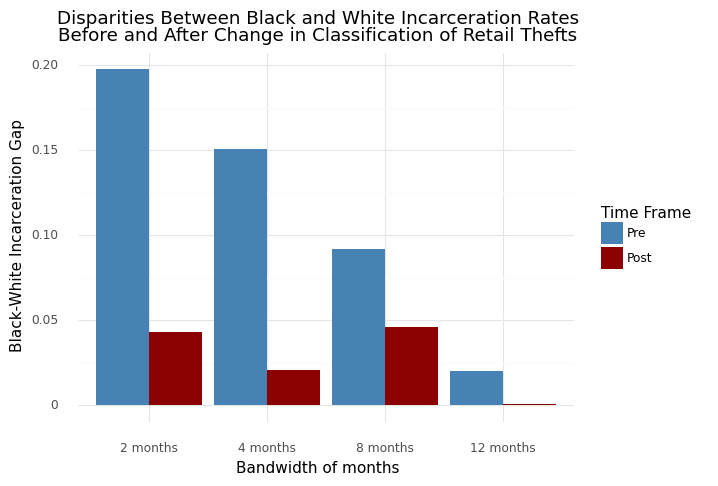

<ggplot: (8761658292158)>

In [22]:
retail_theft = sentencing_cleaned[sentencing_cleaned["simplified_offense_derived"]== "Retail Theft"]
retail_theft[(retail_theft["is_white_derived"] == True) | (retail_theft["is_black_derived"] == True)]

def bandwidth(search_in, search_for, date_min, date_max):
    time_data = search_in[(search_in[search_for] > date_min) & (search_in[search_for] < date_max)].copy()
    
    time_data["post"] = np.where(time_data[search_for] < "2016-12-01", False, True).copy()
    time_data["race"] = np.where(time_data["is_black_derived"] == True, True, False).copy()
    time_data["incarcerated"] = np.where(time_data["COMMITMENT_TYPE"] == "Illinois Department of Corrections", True, False).copy()
    
    incarceration = time_data.groupby(["race", "post", "incarcerated"])["CASE_ID"].count()
    incarceration = pd.DataFrame(incarceration)
    incarceration= incarceration.reset_index()
    
    # rj note- added this print statement bc 
    # time_frame filter is filtering out the first month in the bandwidth accidentally
    # so for first iteration see that only includes november and january, 
    # rather than october and feb as well
    # also inaverdantly still includes december 
    print("Months this round are: " + "; ".join(time_data[search_for].astype(str).unique()))
    
    incarceration_pivot = incarceration.pivot_table(index = ["post", "race"], columns = "incarcerated", values = "CASE_ID" )
    incarceration_pivot = incarceration_pivot.reset_index()
    incarceration_pivot_2 = incarceration_pivot.set_axis(["post", "race", "not", "incarcerated"], axis=1, inplace=False)
    
    incarceration_pivot_2["total"] = incarceration_pivot_2["not"] + incarceration_pivot_2["incarcerated"]
    incarceration_pivot_2["prop"] = incarceration_pivot_2["incarcerated"]/ incarceration_pivot_2["total"]
    incarceration_pivot_3 = incarceration_pivot_2.pivot_table(index = ["post"], columns = "race", values = "prop" )
    incarceration_pivot_3["bandwidth"] = date_min
    incarceration_pivot_3 = incarceration_pivot_3.set_axis(["white", "black", "start"], axis=1, inplace=False)
    incarceration_pivot_3["gap"] = incarceration_pivot_3["black"] - incarceration_pivot_3["white"]
    incarceration_pivot_4 = incarceration_pivot_3.reset_index()
    incarceration_pivot_4 =  incarceration_pivot_4[["post", "start", "gap"]]

    return(incarceration_pivot_4)

retail_theft_2mon = bandwidth(retail_theft, "sentenceym_derived", "2016-10-01", "2017-02-01")
retail_theft_4mon = bandwidth(retail_theft, "sentenceym_derived", "2016-08-01", "2017-04-01")
retail_theft_8mon = bandwidth(retail_theft, "sentenceym_derived", "2016-04-01", "2017-06-01")
retail_theft_12mon = bandwidth(retail_theft, "sentenceym_derived", "2015-12-01", "2017-12-01")

final_plot_2 = pd.concat([retail_theft_2mon, retail_theft_4mon, retail_theft_8mon, retail_theft_12mon])


print(final_plot_2)
final_plot_2.info()

plot3 = (p9.ggplot(data = final_plot_2, mapping = p9.aes(x = "start", y = "gap", fill = "post")) +
        p9.geom_bar(stat = "identity", position = "dodge") + 
        p9.theme_minimal() +  
        p9.scale_fill_manual(values = ["steelblue", "darkred"], labels = ["Pre", "Post"]) + 
        p9.labs(x = "Bandwidth of months", y = "Black-White Incarceration Gap", title = "Disparities Between Black and White Incarceration Rates\nBefore and After Change in Classification of Retail Thefts", fill = "Time Frame") + 
        p9.scales.scale_x_discrete(labels = ["2 months", "4 months", "8 months", "12 months"]))
         
         
plot3

Those who argued that the retail theft policy change would narrow disparities were correct and this is evident looking at all time frames pre and post change. It is clear that there was much stronger sentencing for cases of theft <$1000 for black defendants and that changing this to not a felony improved the degree of the disparities between black and white defendants. 